 <h1 style='color:purple' align='center'>Data Science Project: Heart Disease </h1>

### Import Necessary Libraries

In [73]:
# For data analysis and manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive visualization
import plotly.express as px
import plotly.graph_objects as go

# For data pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# For imputing missing values
from sklearn.impute import SimpleImputer

# For imputing missing values using Iterative-Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Models for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# impot Pipeline
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [74]:
#load the dataset
df = pd.read_csv('heart_disease_uci.csv')

#gte the first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [75]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Yhere are 920 rows and 16 columns in the dataset.
We can see that there are missing values in the dataset.
5 columns are of float, 3 int and 8 object data types.


In [77]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


25% of patients, with an average age of 47, have no heart disease.

50% of patients, with an average age of 54, have mild heart disease.

75% of patients, with an average age of 60 or older, have moderate heart disease.

In [78]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [79]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [80]:
#imputing missing values
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']



In [81]:
# Function for imputing missing values that are less than 10%

missing_threshold = 10  
total_entries = len(df)
target_variable = 'num'

numerical_cols = []
for col in df.columns:
    if (df[col].dtype in ['int64', 'float64'] and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and
        col != target_variable):
        numerical_cols.append(col)


categorical_cols = []
for col in df.columns:
    if (df[col].dtype == 'object' and
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold):
        categorical_cols.append(col)


num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])


missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"Sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")

# Display the features with missing values 
print(f"Sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")

Sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

Sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


Right now, there are just 3 fields in our data that have a lot of missing information. To fix this, we're going to use a special tool called "Random Forest" to guess what the missing info might be.

Split the Data: One half (A) has all the information filled in for those 3 fields, the other half (B) has some blanks.

Train the Guessing Tool: We'll use the good half (A) to train our "Random Forest" tool. This tool will look at the filled-in information for all the other fields and try to guess what the missing info in those 3 fields should be.

Make Predictions: Once the tool is trained, we'll use it to guess the missing information for the other half (B) of the data.

Fill in the Blanks: We'll take those guesses and plug them into the blank spaces in half (B) of the data.

Put it Back Together: Finally, we'll stick the two halves of the data (A with all the original info and B with the filled-in blanks) back together to get one complete set of data with no missing information.




In [82]:
# Split the dataset into two subset with one contaning complete data and the other containing missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# Create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

df_missing = df[df.isna().any(axis=1)]

print(f"The shape of the complete dataframe is: {df_clean.shape}")
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

The shape of the complete dataframe is: (299, 16)
The shape of the dataframe with missing values is: (621, 16)


In [83]:
#Using RandomForest Algorithm for imputing missing values that are larger in number

# Training and evaluating the model for the target variables 'slope', 'thanl', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    
    X = df_clean.drop(drop_columns, axis=1)
    
    y = df_clean[target_variable]

    le = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=10, random_state=42)
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    return model

In [84]:
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])


The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [85]:
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])


The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [86]:
rf_model_thal = predict_and_evaluate('thal', ['thal'])


The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



In [87]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

def encode_and_predict(df, target_variable, model):

    le = LabelEncoder()

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    df[target_variable] = model.predict(df)

encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

In [88]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

In [89]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['thal'], axis=1)
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']

In [90]:
# Merge df_clean and df_missing 
df = pd.concat([df_clean, df_missing])

print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the dataset is: 920 rows and 16 columns.


In [91]:
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

There are no missing values in the dataset.


### EDA

In [92]:
#check the min max of age
df['age'].min(), df['age'].max()

print(f"The minimum age is: {df['age'].min()}")
print(f"The maximun age is: {df['age'].max()}")

The minimum age is: 28
The maximun age is: 77


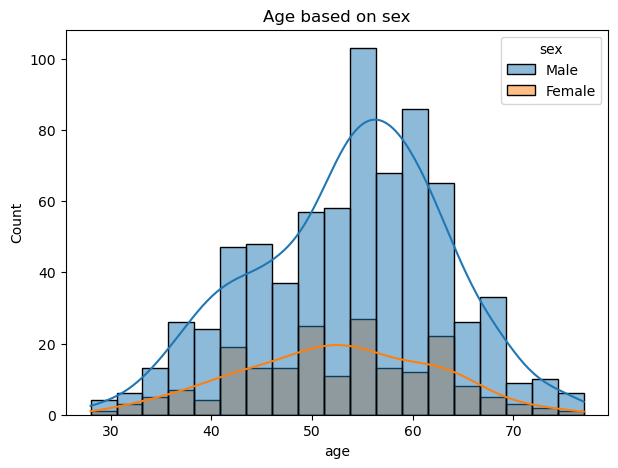

In [93]:
# Let's plot the histogram of age based on gender
plt.figure(figsize = (7, 5))
sns.histplot(df, x = df['age'], hue = 'sex', kde = True)
plt.title('Age based on sex')
plt.show()

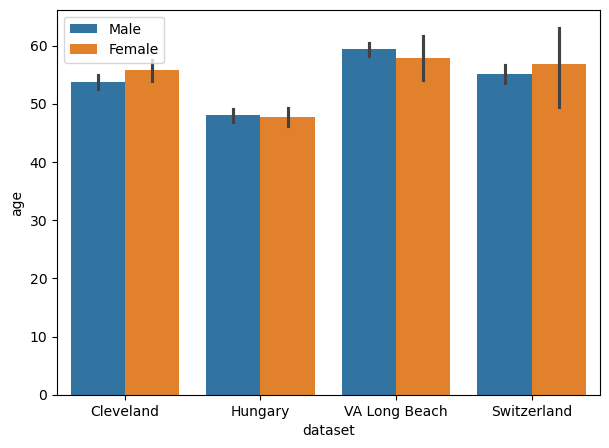

In [94]:
#explore age column based on dataset
plt.figure(figsize=(7, 5))

sns.barplot(df, x = df['dataset'], y = df['age'], hue= 'sex')
plt.legend(loc = 'upper left')
plt.show()

According to our data, we can see that most aged people live in VA Long Beach.
Less aged people in the data lives in Hungary.

<Axes: xlabel='cp', ylabel='age'>

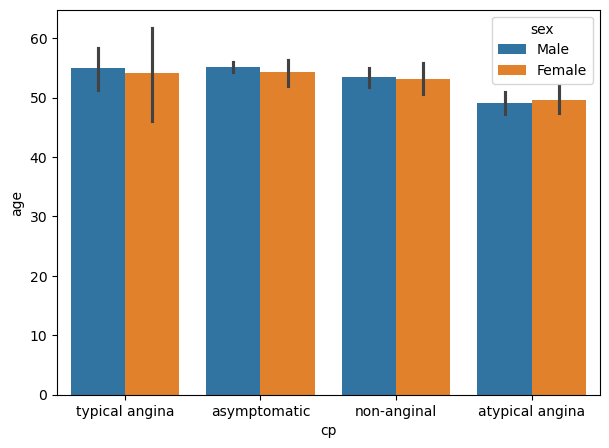

In [95]:
#check how cp type according to age
plt.figure(figsize=(7, 5))

sns.barplot(df, x = df['cp'], y = df['age'], hue='sex')

In [96]:
# Exploring Sex Column

#check the values counts

df['sex'].value_counts()



sex
Male      726
Female    194
Name: count, dtype: int64

In [97]:
# Explore Dataset Column

df['dataset'].value_counts()


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [98]:
df.groupby('sex')['dataset'].value_counts()


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

Most of the male data is collected from Hungry and least from Switzerland.
Most of he famale is collected from Cleveland and least from VA Long Beach

In [99]:
#  Exploring (Chest pain) Column

df['cp'].value_counts()



cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [100]:
df.groupby('cp')['sex'].value_counts()


cp               sex   
asymptomatic     Male      426
                 Female     70
atypical angina  Male      113
                 Female     61
non-anginal      Male      151
                 Female     53
typical angina   Male       36
                 Female     10
Name: count, dtype: int64

asymptomatic:

A large number of male patients (426) are asymptomatic compared to female patients (70).
Suggests that asymptomatic cases are more common in males.

atypical angina:

More males (113) have atypical angina compared to females (61).
Atypical angina is less common than asymptomatic chest pain but still more frequent in males.

non-anginal:

More males (151) have non-anginal chest pain compared to females (53).
Non-anginal chest pain is also more common in males.

typical angina:

Fewest number of patients have typical angina, with males (36) being more than females (10).
Indicates that typical angina is the least common chest pain type in this dataset, but still more common in males.

In [101]:
# Exploring  trestbps (The person's resting blood pressure mm Hg) Column
df['trestbps'].describe()


count    920.000000
mean     131.995652
std       18.451300
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Here we can see that average trestbps is almost 132 mm Hg.
Only 25% people have 120 mm Hg which is normal blood pressure.
We can also see that 0 mm Hg which is not possible for a living person.
The max bp is 200 mm Hg.

In [102]:
df[df['trestbps'] == 0]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.0,reversable defect,3


In [103]:
df.drop(df[df['trestbps'] == 0].index, inplace = True)


In [104]:
# Exploringg chol (Cholestoral level) Column

df['chol'].describe()


count    919.000000
mean     200.126224
std      108.899633
min        0.000000
25%      178.500000
50%      223.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64

In [105]:
print(f"Average chol level is {round(df['chol'].mean(), 2)}")


Average chol level is 200.13


In [106]:
# Exploring fbs (Fasting Blood Pressure) Column
df['fbs'].value_counts()



fbs
False    781
True     138
Name: count, dtype: int64

In [107]:
df.groupby('fbs')['sex'].value_counts()


fbs    sex   
False  Male      606
       Female    175
True   Male      119
       Female     19
Name: count, dtype: int64

In [108]:
# exploring restecg Column
df['restecg'].value_counts()


restecg
normal              552
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Most of the patients have normal restecg.


In [109]:
#thalch (The person's maximum heart rate achieved) Column
df['thalch'].describe()


count    919.000000
mean     137.673558
std       25.152434
min       60.000000
25%      120.000000
50%      140.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64

In [110]:
#Exploring  exang (Exercise-Induced Angina) Column
df['exang'].value_counts()


exang
False    582
True     337
Name: count, dtype: int64

In [111]:
df.groupby(df['exang'])[['sex']].value_counts()


exang  sex   
False  Male      431
       Female    151
True   Male      294
       Female     43
Name: count, dtype: int64

In [112]:
# exploring oldpeak Column
df['oldpeak'].describe()


count    919.000000
mean       0.852557
std        1.058409
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [113]:
# Exploring Slop column

df['slope'].value_counts()


slope
flat           618
upsloping      274
downsloping     27
Name: count, dtype: int64

In [114]:
#Exploring ca (Number of Major Vessels Colored by Fluoroscopy) Column

df['ca'].value_counts()


ca
0.0    720
1.0    114
2.0     63
3.0     22
Name: count, dtype: int64

In [115]:
#thal (Thalassemia Type) Column
df['thal'].value_counts()



thal
normal               489
reversable defect    391
fixed defect          39
Name: count, dtype: int64

In [116]:
# Exploring num (Heart Disease Presence) Column

df['num'].value_counts()


num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

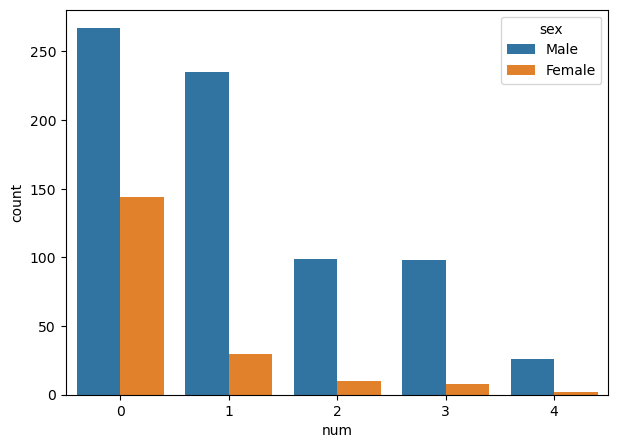

In [117]:
plt.figure(figsize=(7, 5))

sns.countplot(df, x = df['num'], hue = 'sex')
plt.show()

In [118]:
df.groupby(df['num'])[['dataset']].value_counts()


num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     41
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

In [119]:
#Scale the numerical columns in the dataset
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

for col in columns_to_scale:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [120]:
#Encoding the categorical columns using LabelEncoder
lab_enc = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = lab_enc.fit_transform(df[col])


### Machine Learning models building

In [121]:
X = df.drop(['id', 'num'], axis = 1)
y = df['num']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


In [123]:
print(f"The shape of train data is {X_train.shape} anad test data is {X_test.shape}")


The shape of train data is (735, 14) anad test data is (184, 14)


In [124]:
# creating function to find best model:
def find_best_model(X, y, X_test, y_test):
    global y_pred,best_model_name
    np.random.seed(42)
    models = {
        'LogisticRegression': (LogisticRegression(random_state=42), {}),

        'SVC': (SVC(random_state=42), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}),

        'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),

        'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),

        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),

        'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'n_estimators': [10, 100, 1000]}),

    }

    best_model_name = None
    best_accuracy = 0.0 

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(X, y)

            y_pred = grid_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", accuracy)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = name
        except Exception as e:
            print(f"Error for model {name}: {e}")

    # Retrieve the best model
    print("Best Model:", best_model_name)
    print('Test Accuracy of the Best Model:', (best_accuracy)*100)

In [125]:
find_best_model(X, y, X_test, y_test)


Model: LogisticRegression
Cross-validation Accuracy: 0.5133998574483251
Test Accuracy: 0.6358695652173914

_______________________________________________________________

Model: SVC
Cross-validation Accuracy: 0.5526847232121644
Test Accuracy: 0.6358695652173914

_______________________________________________________________

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.47637205987170345
Test Accuracy: 0.9021739130434783

_______________________________________________________________

Model: RandomForestClassifier
Cross-validation Accuracy: 0.5298289379900214
Test Accuracy: 0.7119565217391305

_______________________________________________________________

Model: KNeighborsClassifier
Cross-validation Accuracy: 0.5538132573057734
Test Accuracy: 0.6086956521739131

_______________________________________________________________

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.46227726300784033
Test Accuracy: 0.6956521739130435

____________________________